# Introduction

Develop robust machine learning models to accurately predict hotel reservation cancellations. By utilizing these models, the company aims to improve revenue management, optimize resource allocation, and potentially implement targeted retention strategies.

# Imported Required Libiaries

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load The Dataset

In [5]:
#load the data set
df= pd.read_csv("C:\\Users\\ragul\\project\\Hotel Reservations.csv")

In [7]:
df

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36270,INN36271,3,0,2,6,Meal Plan 1,0,Room_Type 4,85,2018,8,3,Online,0,0,0,167.80,1,Not_Canceled
36271,INN36272,2,0,1,3,Meal Plan 1,0,Room_Type 1,228,2018,10,17,Online,0,0,0,90.95,2,Canceled
36272,INN36273,2,0,2,6,Meal Plan 1,0,Room_Type 1,148,2018,7,1,Online,0,0,0,98.39,2,Not_Canceled
36273,INN36274,2,0,0,3,Not Selected,0,Room_Type 1,63,2018,4,21,Online,0,0,0,94.50,0,Canceled


# Data profilling

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

In [11]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
no_of_adults,36275.0,1.844962,0.518715,0.0,2.0,2.00,2.0,4.0
no_of_children,36275.0,0.105279,0.402648,0.0,0.0,0.00,0.0,10.0
no_of_weekend_nights,36275.0,0.810724,0.870644,0.0,0.0,1.00,2.0,7.0
no_of_week_nights,36275.0,2.204300,1.410905,0.0,1.0,2.00,3.0,17.0
required_car_parking_space,36275.0,0.030986,0.173281,0.0,0.0,0.00,0.0,1.0
lead_time,36275.0,85.232557,85.930817,0.0,17.0,57.00,126.0,443.0
arrival_year,36275.0,2017.820427,0.383836,2017.0,2018.0,2018.00,2018.0,2018.0
arrival_month,36275.0,7.423653,3.069894,1.0,5.0,8.00,10.0,12.0
arrival_date,36275.0,15.596995,8.740447,1.0,8.0,16.00,23.0,31.0
repeated_guest,36275.0,0.025637,0.158053,0.0,0.0,0.00,0.0,1.0


In [13]:
df.nunique()

Booking_ID                              36275
no_of_adults                                5
no_of_children                              6
no_of_weekend_nights                        8
no_of_week_nights                          18
type_of_meal_plan                           4
required_car_parking_space                  2
room_type_reserved                          7
lead_time                                 352
arrival_year                                2
arrival_month                              12
arrival_date                               31
market_segment_type                         5
repeated_guest                              2
no_of_previous_cancellations                9
no_of_previous_bookings_not_canceled       59
avg_price_per_room                       3930
no_of_special_requests                      6
booking_status                              2
dtype: int64

In [15]:
df.describe(include='object').T

,count,unique,top,freq
Booking_ID,36275,36275,INN00001,1
type_of_meal_plan,36275,4,Meal Plan 1,27835
room_type_reserved,36275,7,Room_Type 1,28130
market_segment_type,36275,5,Online,23214
booking_status,36275,2,Not_Canceled,24390


# Exploaring Data Analysis

EDA allows us to gain a comprehensive overview of the data's structure, uncover potential patterns, and identify key trends. Throughout the EDA process, we will analyze the distribution of individual features, investigate correlations, and explore any inherent relationships between variable.Visualizations will play a crucial role in providing a clear representation of the data, offering insights into customer behavior and identifying the factors that may contribute Cancelation predection.

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

In [19]:
# check the first 5 rows
df.head(5)

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled


In [21]:
# check the last 5 rows
df.tail(5)

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
36270,INN36271,3,0,2,6,Meal Plan 1,0,Room_Type 4,85,2018,8,3,Online,0,0,0,167.80,1,Not_Canceled
36271,INN36272,2,0,1,3,Meal Plan 1,0,Room_Type 1,228,2018,10,17,Online,0,0,0,90.95,2,Canceled
36272,INN36273,2,0,2,6,Meal Plan 1,0,Room_Type 1,148,2018,7,1,Online,0,0,0,98.39,2,Not_Canceled
36273,INN36274,2,0,0,3,Not Selected,0,Room_Type 1,63,2018,4,21,Online,0,0,0,94.50,0,Canceled
36274,INN36275,2,0,1,2,Meal Plan 1,0,Room_Type 1,207,2018,12,30,Offline,0,0,0,161.67,0,Not_Canceled


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

In [25]:
categorical_columns = df.select_dtypes(include=['object']).columns
print(categorical_columns)

Index(['Booking_ID', 'type_of_meal_plan', 'room_type_reserved',
       'market_segment_type', 'booking_status'],
      dtype='object')


In [27]:
columns_to_drop = ['Booking_ID']
df = df.drop(columns=columns_to_drop)

In [29]:
df

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36270,3,0,2,6,Meal Plan 1,0,Room_Type 4,85,2018,8,3,Online,0,0,0,167.80,1,Not_Canceled
36271,2,0,1,3,Meal Plan 1,0,Room_Type 1,228,2018,10,17,Online,0,0,0,90.95,2,Canceled
36272,2,0,2,6,Meal Plan 1,0,Room_Type 1,148,2018,7,1,Online,0,0,0,98.39,2,Not_Canceled
36273,2,0,0,3,Not Selected,0,Room_Type 1,63,2018,4,21,Online,0,0,0,94.50,0,Canceled


#### 1.Distribution of Rooms Types

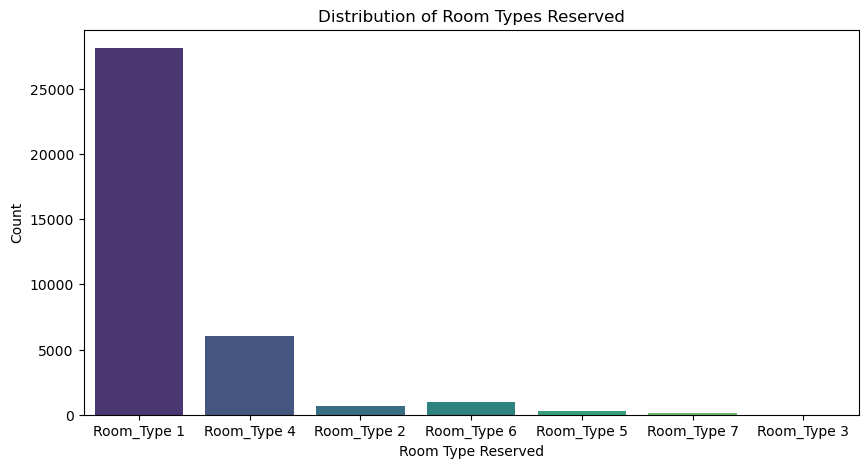

In [31]:
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='room_type_reserved', palette='viridis')
plt.title('Distribution of Room Types Reserved')
plt.xlabel('Room Type Reserved')
plt.ylabel('Count')
plt.show()

#### 2.Distribution of Market Sergment Types

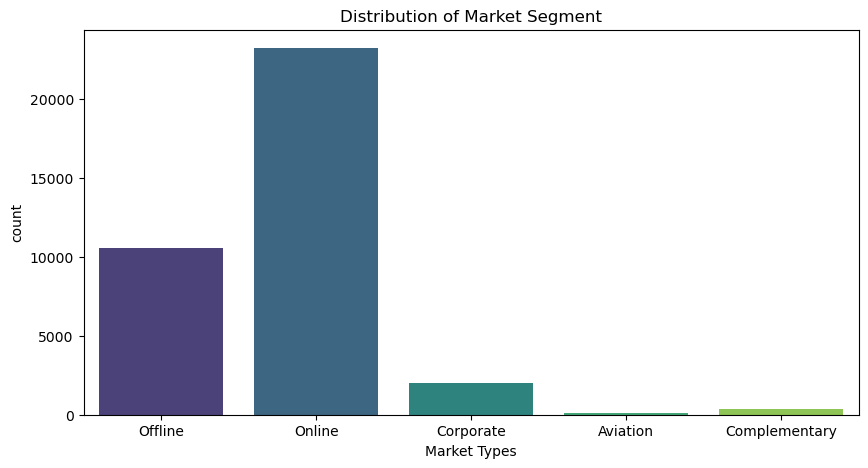

In [33]:
plt.figure(figsize=(10,5))
sns.countplot(data=df, x='market_segment_type',palette='viridis')
plt.title('Distribution of Market Segment')
plt.xlabel('Market Types')
plt.ylabel('count')
plt.show()

#### 3.Distribution of lead Time

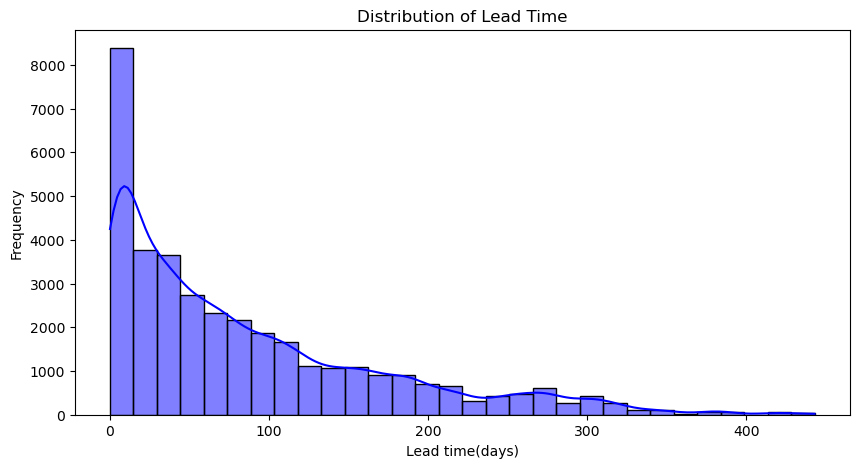

In [36]:
plt.figure(figsize=(10,5))
sns.histplot(df['lead_time'],bins=30,kde=True,color='blue')
plt.title('Distribution of Lead Time')
plt.xlabel('Lead time(days)')
plt.ylabel('Frequency')
plt.show()

#### 4.Distribution of Number of Special Requests

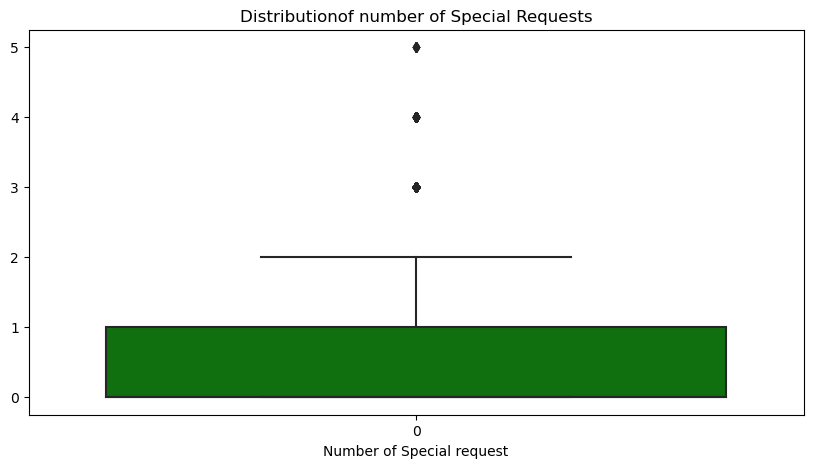

In [39]:
plt.figure(figsize=(10,5))
sns.boxplot(df['no_of_special_requests'],color='green')
plt.title('Distributionof number of Special Requests')
plt.xlabel('Number of Special request')
plt.show()

# Checking the duplicated & Null Values

Before moving further with the analysis, it is essential to ensure the integrity of our dataset. We will begin by examining for any missing values and identifying potential duplicate.This step is crucial for maintaining data quality and setting the foundation for a robust exploratory data analysis (EDA) and subsequent machine learning detectiont

In [42]:
df.duplicated().sum()

10275

In [44]:
df=df.dropna(axis=0).reset_index(drop=True)

In [46]:
print("Total Missing Values :",df.isna().sum().sum())

Total Missing Values : 0


In [48]:
df.isna().sum()

no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 18 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   no_of_adults                          36275 non-null  int64  
 1   no_of_children                        36275 non-null  int64  
 2   no_of_weekend_nights                  36275 non-null  int64  
 3   no_of_week_nights                     36275 non-null  int64  
 4   type_of_meal_plan                     36275 non-null  object 
 5   required_car_parking_space            36275 non-null  int64  
 6   room_type_reserved                    36275 non-null  object 
 7   lead_time                             36275 non-null  int64  
 8   arrival_year                          36275 non-null  int64  
 9   arrival_month                         36275 non-null  int64  
 10  arrival_date                          36275 non-null  int64  
 11  market_segment_

Our dataset does not have any null values and duplicates.Now we can proceed with confidence, knowing that our dataset is clean and ready for further analysis.

# Analysis

To perform a comprehensive analysis, we'd typically start by examining the characteristics of the dataset, exploring the distribution of variables, identifying patterns, and gaining insights that might inform our modeling approach.This, in turn, can lead to more accurate and reliable predictions of Hotel Reservation Cancellation Machine Learning method.

In [52]:
df

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36270,3,0,2,6,Meal Plan 1,0,Room_Type 4,85,2018,8,3,Online,0,0,0,167.80,1,Not_Canceled
36271,2,0,1,3,Meal Plan 1,0,Room_Type 1,228,2018,10,17,Online,0,0,0,90.95,2,Canceled
36272,2,0,2,6,Meal Plan 1,0,Room_Type 1,148,2018,7,1,Online,0,0,0,98.39,2,Not_Canceled
36273,2,0,0,3,Not Selected,0,Room_Type 1,63,2018,4,21,Online,0,0,0,94.50,0,Canceled


In [54]:
# check the value count for no_of_adults
df['no_of_adults'].value_counts()

no_of_adults
2    26108
1     7695
3     2317
0      139
4       16
Name: count, dtype: int64

In [56]:
# check the value count for no_of_children	
df['no_of_children'].value_counts()

no_of_children
0     33577
1      1618
2      1058
3        19
9         2
10        1
Name: count, dtype: int64

In [58]:
# check the value count for no_of_weekend_nights	
df['no_of_weekend_nights'].value_counts()

no_of_weekend_nights
0    16872
1     9995
2     9071
3      153
4      129
5       34
6       20
7        1
Name: count, dtype: int64

In [60]:
# check the value count for no_of_week_nights	
df['no_of_week_nights'].value_counts()

no_of_week_nights
2     11444
1      9488
3      7839
4      2990
0      2387
5      1614
6       189
7       113
10       62
8        62
9        34
11       17
15       10
12        9
14        7
13        5
17        3
16        2
Name: count, dtype: int64

In [62]:
# check the value count  for type_of_meal_plan
df['type_of_meal_plan'].value_counts()

type_of_meal_plan
Meal Plan 1     27835
Not Selected     5130
Meal Plan 2      3305
Meal Plan 3         5
Name: count, dtype: int64

In [64]:
# check the value count for required_car_parking_space
df['required_car_parking_space'].value_counts()

required_car_parking_space
0    35151
1     1124
Name: count, dtype: int64

In [66]:
# check the value count for market_segment_type
df['market_segment_type'].value_counts()

market_segment_type
Online           23214
Offline          10528
Corporate         2017
Complementary      391
Aviation           125
Name: count, dtype: int64

In [68]:
# check the value count for repeated_guest
df['repeated_guest'].value_counts()

repeated_guest
0    35345
1      930
Name: count, dtype: int64

In [70]:
# check the value counts for no_of_previous_cancellations
df['no_of_previous_cancellations'].value_counts()

no_of_previous_cancellations
0     35937
1       198
2        46
3        43
11       25
5        11
4        10
13        4
6         1
Name: count, dtype: int64

In [72]:
# check the values counts forno_of_previous_bookings_not_canceled
df['no_of_previous_bookings_not_canceled'].value_counts()

no_of_previous_bookings_not_canceled
0     35463
1       228
2       112
3        80
4        65
5        60
6        36
7        24
8        23
10       19
9        19
11       15
12       12
14        9
15        8
16        7
13        7
18        6
20        6
21        6
17        6
19        6
22        6
25        3
27        3
24        3
23        3
44        2
29        2
48        2
28        2
30        2
32        2
31        2
26        2
46        1
55        1
45        1
57        1
53        1
54        1
58        1
41        1
40        1
43        1
35        1
50        1
56        1
33        1
37        1
42        1
51        1
38        1
34        1
39        1
52        1
49        1
47        1
36        1
Name: count, dtype: int64

In [74]:
# check the value counts for no_of_special_requests
df['no_of_special_requests'].value_counts()

no_of_special_requests
0    19777
1    11373
2     4364
3      675
4       78
5        8
Name: count, dtype: int64

In [76]:
# check the value counts for booking_status
df['booking_status'].value_counts()

booking_status
Not_Canceled    24390
Canceled        11885
Name: count, dtype: int64

In [78]:
#check the value counts for arrival_year
df['arrival_year'].value_counts()

arrival_year
2018    29761
2017     6514
Name: count, dtype: int64

# Data Visualization

Data visualization is a powerful tool for understanding patterns, trends, and relationships within your dataset.This techniques you can use to analyze your dataset for visualization plot.Depending on the specific questions you want to explore and the characteristics of your data, you can customize these visualizations and explore additional techniques as needed

### Categorical VS Target Variables

#### 1.Distribution of Rooms type across booking Status

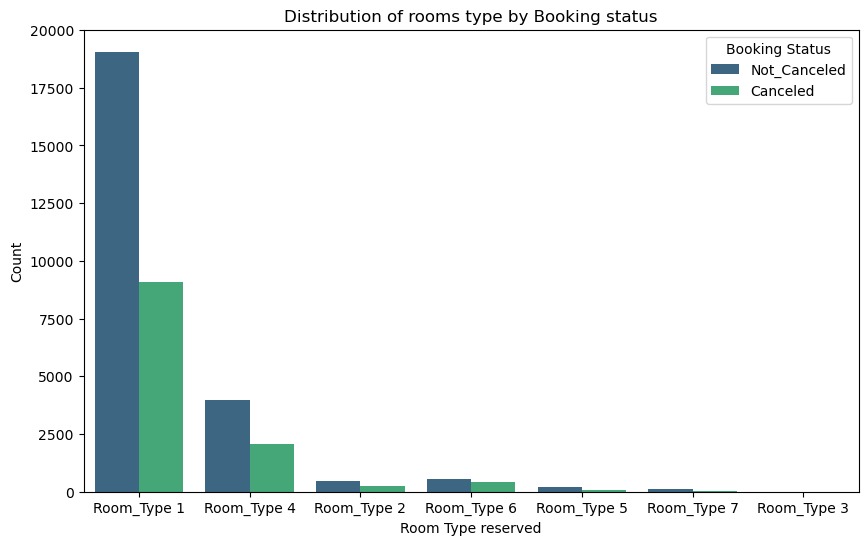

In [80]:
plt.figure(figsize=(10,6))
sns.countplot(data=df, x='room_type_reserved' , hue='booking_status' ,palette='viridis')
plt.title('Distribution of rooms type by Booking status')
plt.xlabel('Room Type reserved')
plt.ylabel('Count')
plt.legend(title='Booking Status')
plt.show()

#### 2. Numerical vs. Target variables

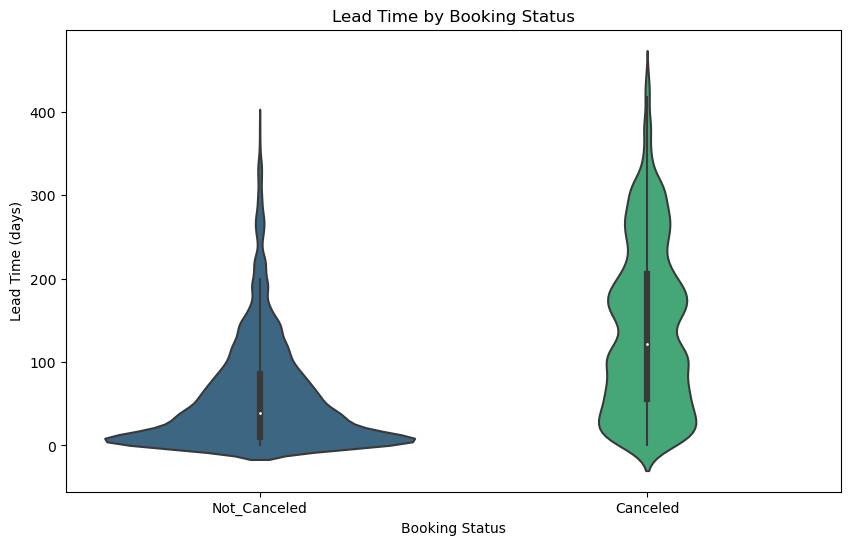

In [82]:
# Violin Plot Example: Lead Time vs. Booking Status
plt.figure(figsize=(10, 6))
sns.violinplot(data=df, x='booking_status', y='lead_time', palette='viridis')
plt.title('Lead Time by Booking Status')
plt.xlabel('Booking Status')
plt.ylabel('Lead Time (days)')
plt.show()

#### 3.Pie Chart for Room type reserved

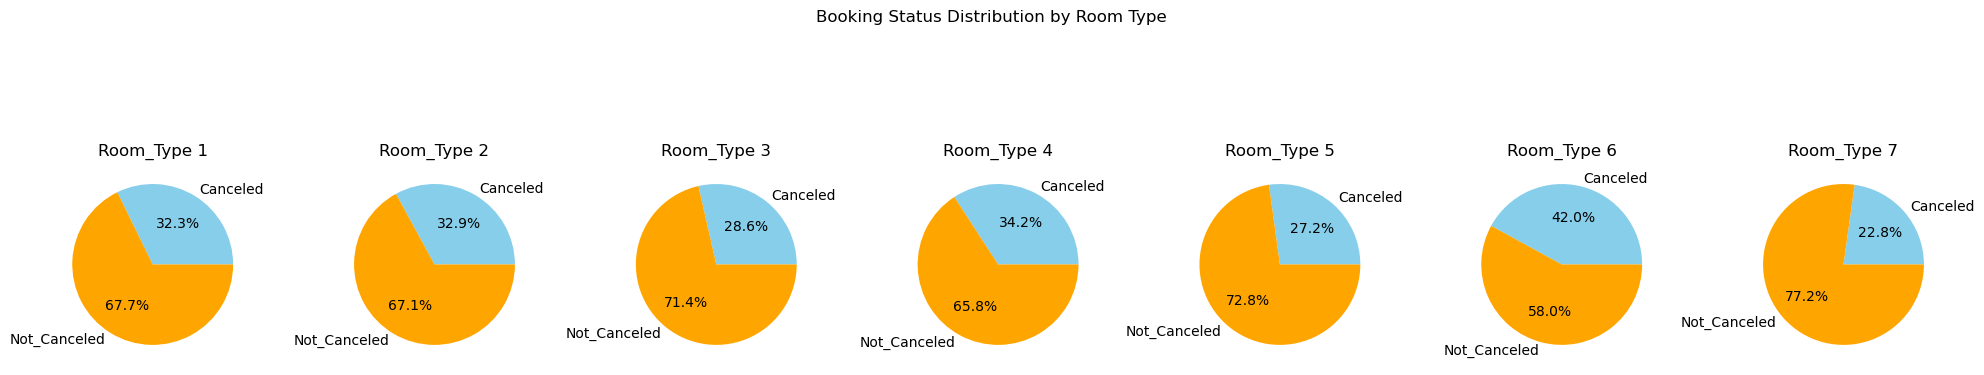

In [84]:
room_status_counts = df.groupby(['room_type_reserved', 'booking_status']).size().unstack()
room_types = room_status_counts.index
n_rooms = len(room_types)
fig, axes = plt.subplots(1, n_rooms, figsize=(20, 5))

for i, room in enumerate(room_types):
    axes[i].pie(room_status_counts.loc[room], labels=room_status_counts.columns, autopct='%1.1f%%', colors=['skyblue', 'orange'])
    axes[i].set_title(room)

plt.suptitle('Booking Status Distribution by Room Type')
plt.tight_layout()
plt.show()

#### 4.Lead Time Distribution by Booking Status

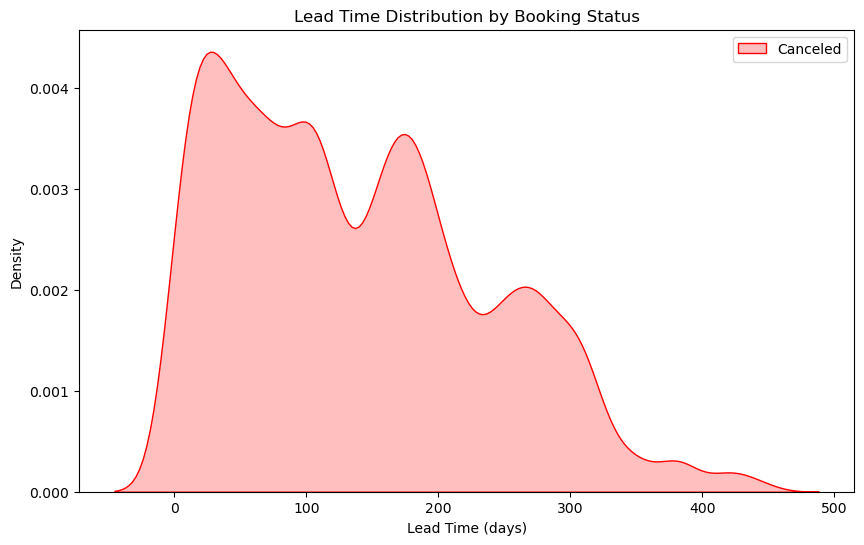

In [86]:
# KDE Plot Example: Lead Time Distribution by Booking Status
plt.figure(figsize=(10, 6))
sns.kdeplot(data=df[df['booking_status'] == 'Canceled']['lead_time'], label='Canceled', shade=True, color='r')
sns.kdeplot(data=df[df['booking_status'] == 'Not Canceled']['lead_time'], label='Not Canceled', shade=True, color='b')
plt.title('Lead Time Distribution by Booking Status')
plt.xlabel('Lead Time (days)')
plt.ylabel('Density')
plt.legend()
plt.show()

#### 5.Arival month

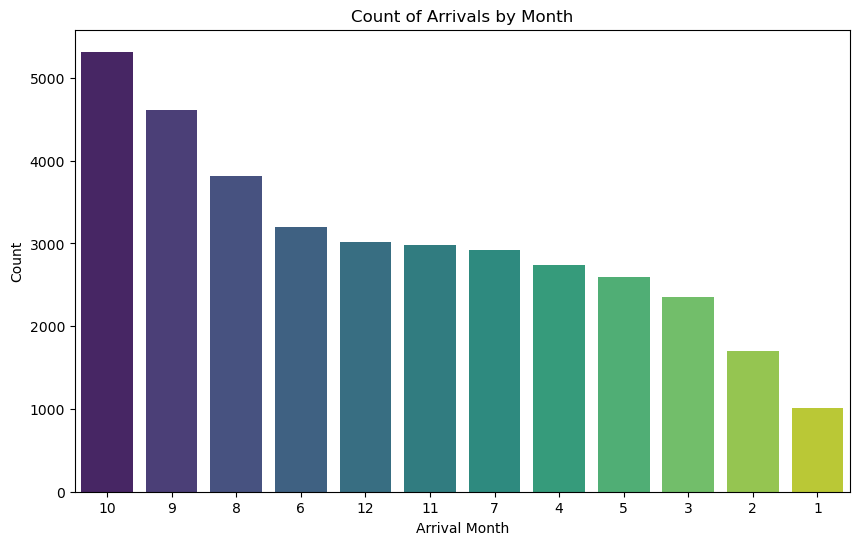

In [88]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='arrival_month', palette='viridis', order=df['arrival_month'].value_counts().index)
plt.title('Count of Arrivals by Month')
plt.xlabel('Arrival Month')
plt.ylabel('Count')
plt.show()

#### 6. Arrival by Date

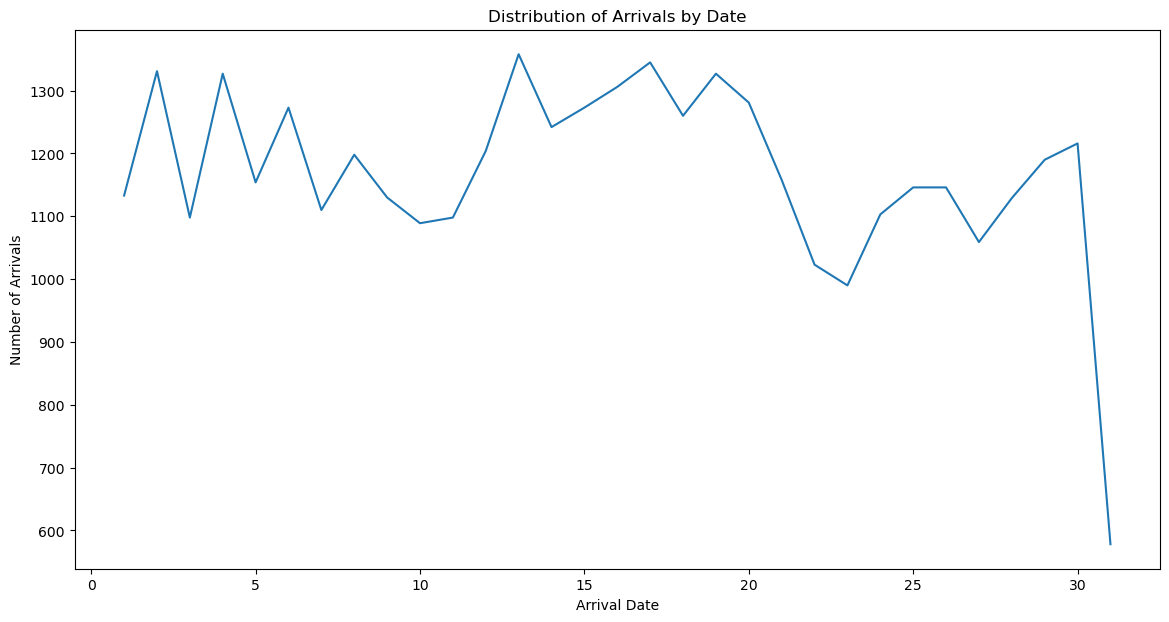

In [90]:
#Distribution of Arrivals by Date (if specific dates are of interest)
plt.figure(figsize=(14, 7))
df['arrival_date'].value_counts().sort_index().plot()
plt.title('Distribution of Arrivals by Date')
plt.xlabel('Arrival Date')
plt.ylabel('Number of Arrivals')
plt.show()

# Correlation Heatmap

In [92]:
from sklearn.preprocessing import LabelEncoder

In [94]:
le = LabelEncoder()

In [96]:
# Exclude non-numeric columns
numeric_data = df.select_dtypes(include=['number'])

In [98]:
# Compute the correlation matrix
correlation_matrix = numeric_data.corr()

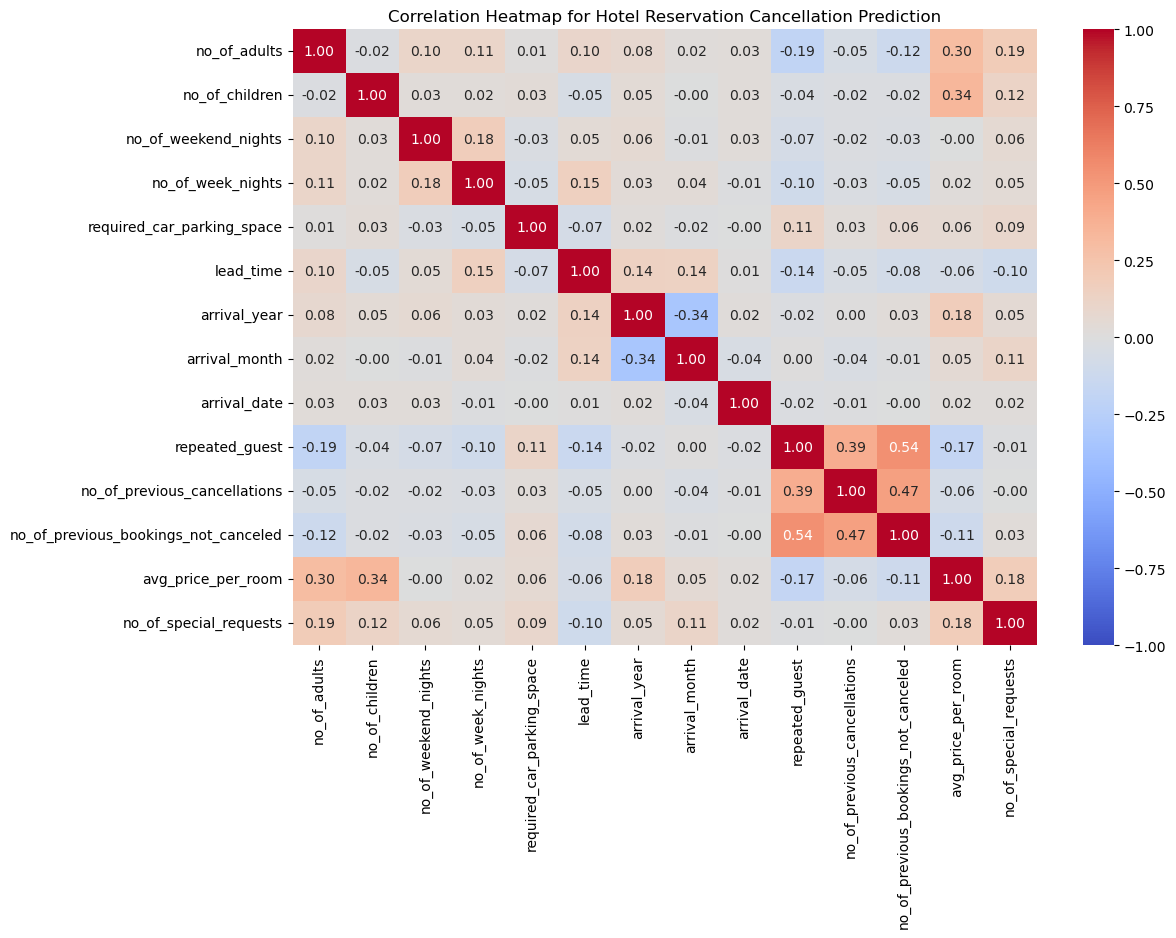

In [100]:
# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap for Hotel Reservation Cancellation Prediction')
plt.show()

Upon inspecting the heatmap, we can see that there is no significant correlation observed among the columns. As a result, no columns will be dropped solely based on correlation.

### Insights that we got from EDA

1) No null values or duplicates were found in the dataset, ensuring its reliability.
2) To ensure consistent scales for numerical features, we will employ StandardScaler during preprocessing.

# Analyze the Distribution of the Target Variable

In [102]:
# Count the occurrences of each class in the target variable 'booking_status'
booking_status_counts = df['booking_status'].value_counts()

In [104]:
# Display the counts
print(booking_status_counts)

booking_status
Not_Canceled    24390
Canceled        11885
Name: count, dtype: int64


In [106]:
# Calculate the percentage distribution
booking_status_percent = df['booking_status'].value_counts(normalize=True) * 100

In [108]:
# Display the percentage distribution
print(booking_status_percent)

booking_status
Not_Canceled    67.236389
Canceled        32.763611
Name: proportion, dtype: float64


### Investigate the relationship between guest composition (adults, children) and cancellation likelihood.

In [110]:
df['booking_status'] = df['booking_status'].map({'Not_Canceled': 0, 'Canceled': 1})

In [112]:
# Create a new dataframe for analysis
df_analysis = df[['no_of_adults', 'no_of_children', 'booking_status']].copy()

In [114]:
# Create a new column 'total_guests' as the sum of adults and children
df_analysis['repeated_guest'] = df_analysis['no_of_adults'] + df_analysis['no_of_children']

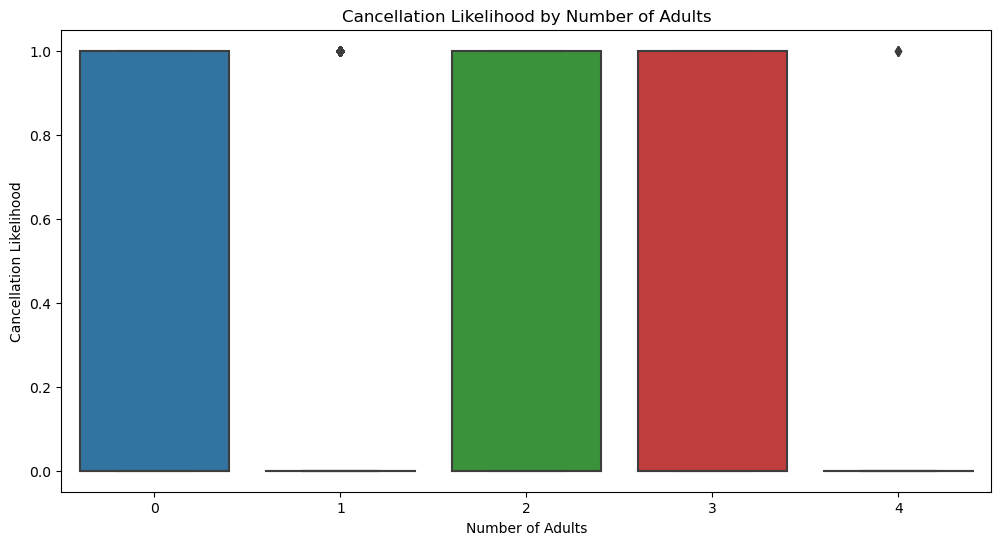

In [116]:
# Plot the distribution of cancellations by number of adults
plt.figure(figsize=(12, 6))
sns.boxplot(x='no_of_adults', y='booking_status', data=df_analysis)
plt.title('Cancellation Likelihood by Number of Adults')
plt.xlabel('Number of Adults')
plt.ylabel('Cancellation Likelihood')
plt.show()

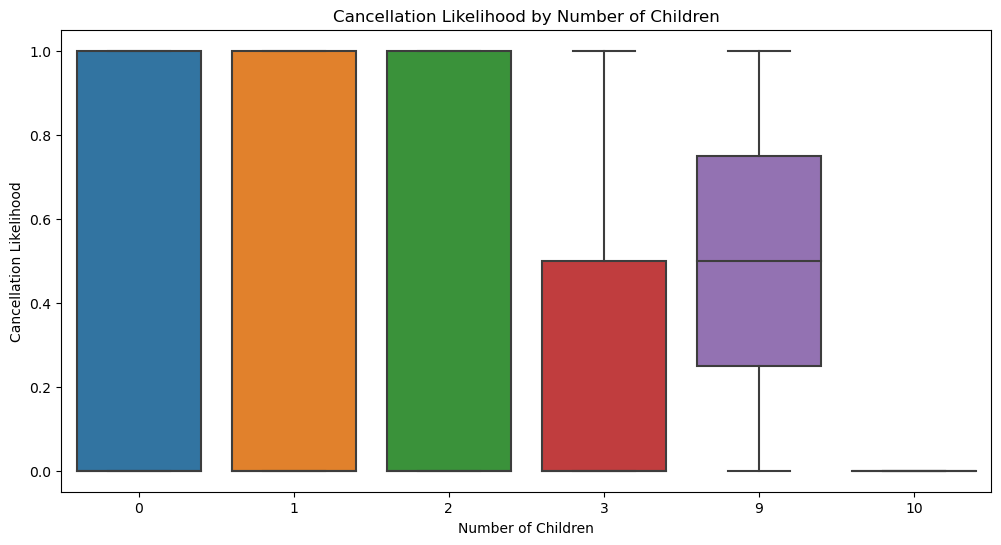

In [118]:
# Plot the distribution of cancellations by number of children
plt.figure(figsize=(12, 6))
sns.boxplot(x='no_of_children', y='booking_status', data=df_analysis)
plt.title('Cancellation Likelihood by Number of Children')
plt.xlabel('Number of Children')
plt.ylabel('Cancellation Likelihood')
plt.show()

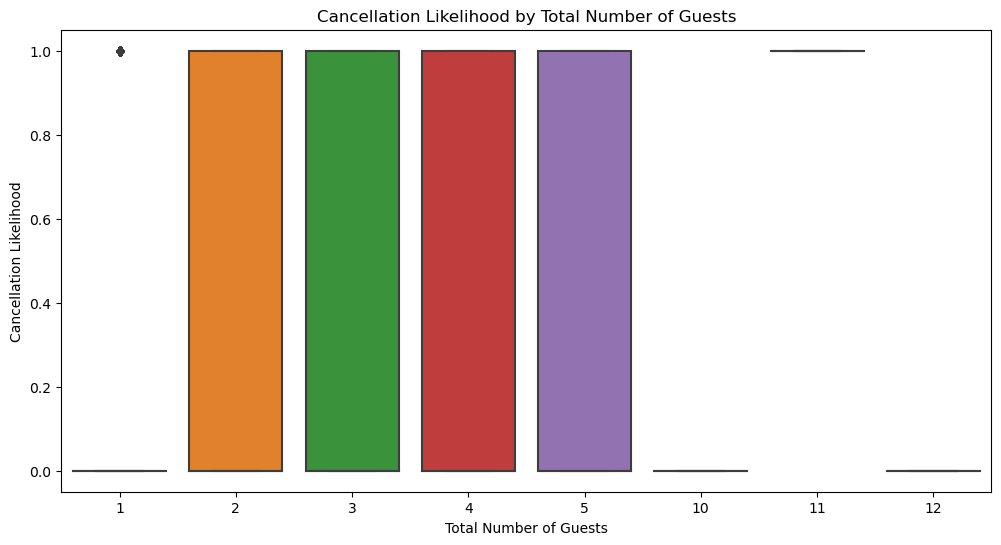

In [120]:
# Plot the distribution of cancellations by total number of guests
plt.figure(figsize=(12, 6))
sns.boxplot(x='repeated_guest', y='booking_status', data=df_analysis)
plt.title('Cancellation Likelihood by Total Number of Guests')
plt.xlabel('Total Number of Guests')
plt.ylabel('Cancellation Likelihood')
plt.show()

### Examine the effect of booking timing (weekdays vs. weekends) on cancellations

In [122]:
# Determine if the day is a weekday or weekend
df['no_of_weekend_nights'] = df['no_of_week_nights'].apply(lambda x: 1 if x in ['Saturday', 'Sunday'] else 0)

In [124]:
# Create a new dataframe for analysis
df_analysis = df[['no_of_weekend_nights', 'booking_status']].copy()

In [126]:
# Compute cancellation rates for weekdays vs. weekends
cancellation_rate_by_day_type = df_analysis.groupby('no_of_weekend_nights')['booking_status'].mean()

In [128]:
# Display cancellation rates
print("Cancellation Rate by Booking Timing (Weekday vs. Weekend):")
print(cancellation_rate_by_day_type)

Cancellation Rate by Booking Timing (Weekday vs. Weekend):
no_of_weekend_nights
0    0.327636
Name: booking_status, dtype: float64


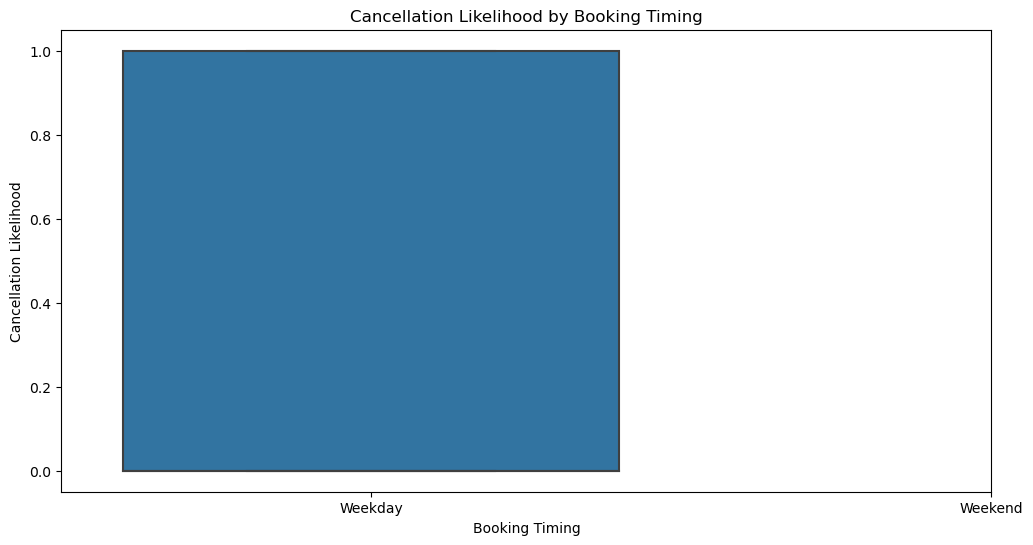

In [130]:
# Plot the distribution of cancellations by booking timing
plt.figure(figsize=(12, 6))
sns.boxplot(x='no_of_weekend_nights', y='booking_status', data=df_analysis)
plt.title('Cancellation Likelihood by Booking Timing')
plt.xlabel('Booking Timing')
plt.ylabel('Cancellation Likelihood')
plt.xticks(ticks=[0, 1], labels=['Weekday', 'Weekend'])
plt.show()

Here mostly cancellation happend in weekday only.because of booking time get delayed depend onthe room type.

# Check The Dataset is Balanced or Imbalanced

In [132]:
# Check for imbalance
if booking_status_percent.max() > 60:
    print("The dataset is imbalanced.")
else:
    print("The dataset is balanced.")

The dataset is imbalanced.


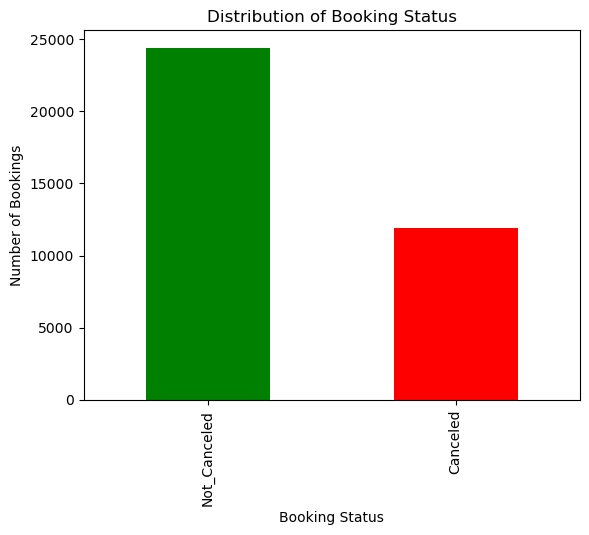

In [134]:
# Plot the distribution
booking_status_counts.plot(kind='bar', color=['green', 'red'])
plt.title('Distribution of Booking Status')
plt.xlabel('Booking Status')
plt.ylabel('Number of Bookings')
plt.show()

The target variable, "booking_status" exhibits imbalance. To address this, we will apply oversampling using SMOTE, ensuring fair representation for model training.

# Preprocessing

##### First, Let's drop the columns that don't provide any useful information for our predictions

In [136]:
# Dropping irrelevant columns 
df = df.drop(['type_of_meal_plan', 'room_type_reserved', 'market_segment_type'], axis=1)

In [138]:
df

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,0,0,2,0,224,2017,10,2,0,0,0,65.00,0,0
1,2,0,0,3,0,5,2018,11,6,0,0,0,106.68,1,0
2,1,0,0,1,0,1,2018,2,28,0,0,0,60.00,0,1
3,2,0,0,2,0,211,2018,5,20,0,0,0,100.00,0,1
4,2,0,0,1,0,48,2018,4,11,0,0,0,94.50,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36270,3,0,0,6,0,85,2018,8,3,0,0,0,167.80,1,0
36271,2,0,0,3,0,228,2018,10,17,0,0,0,90.95,2,1
36272,2,0,0,6,0,148,2018,7,1,0,0,0,98.39,2,0
36273,2,0,0,3,0,63,2018,4,21,0,0,0,94.50,0,1


# Encoding Categorical Variables

To convert categorical data into numerical, we will use the one-hot encoding technique. This process involves assigning binary numeric values to each unique class present in columns with categorical data. By creating binary columns for each category, we ensure that our models can effectively interpret and utilize the categorical information during training and prediction.

In [140]:
#Let's convert all the categorical variables into dummy variables
df_dummies = pd.get_dummies(df)
df_dummies.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,0,0,2,0,224,2017,10,2,0,0,0,65.00,0,0
1,2,0,0,3,0,5,2018,11,6,0,0,0,106.68,1,0
2,1,0,0,1,0,1,2018,2,28,0,0,0,60.00,0,1
3,2,0,0,2,0,211,2018,5,20,0,0,0,100.00,0,1
4,2,0,0,1,0,48,2018,4,11,0,0,0,94.50,0,1


In [142]:
df_dummies = pd.get_dummies(df)
df_dummies.tail()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
36270,3,0,0,6,0,85,2018,8,3,0,0,0,167.80,1,0
36271,2,0,0,3,0,228,2018,10,17,0,0,0,90.95,2,1
36272,2,0,0,6,0,148,2018,7,1,0,0,0,98.39,2,0
36273,2,0,0,3,0,63,2018,4,21,0,0,0,94.50,0,1
36274,2,0,0,2,0,207,2018,12,30,0,0,0,161.67,0,0


In [144]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 15 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   no_of_adults                          36275 non-null  int64  
 1   no_of_children                        36275 non-null  int64  
 2   no_of_weekend_nights                  36275 non-null  int64  
 3   no_of_week_nights                     36275 non-null  int64  
 4   required_car_parking_space            36275 non-null  int64  
 5   lead_time                             36275 non-null  int64  
 6   arrival_year                          36275 non-null  int64  
 7   arrival_month                         36275 non-null  int64  
 8   arrival_date                          36275 non-null  int64  
 9   repeated_guest                        36275 non-null  int64  
 10  no_of_previous_cancellations          36275 non-null  int64  
 11  no_of_previous_

# Splitting the data into x and y

Now, we partition the dataset into two components: x and y. The variable x encompasses all independent variables, representing the features that contribute to our predictions. On the other hand, y encapsulates the dependent variable or target variable, serving as the outcome we aim to predict.

In [146]:
from sklearn.model_selection import train_test_split

In [147]:
x= df.drop('booking_status', axis=1)
y = df['booking_status']

# Train-Test Split

We'll now split the dataset into training and testing data. We will do an 80:20 split, so our test size will be set to 0.3.We will take Random State as 42. This will guarantee the reproducibility of our results across different runs.

In [150]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [152]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(25392, 14)
(10883, 14)
(25392,)
(10883,)


# Standard Scaler

We will now use Standard Scaler to standardize the features of the dataset. This ensures that the consistency between the features of the dataset is maintained. Standardization is crucial for certain machine learning algorithms, promoting optimal model performance by mitigating the influence of varying magnitudes among features.

In [154]:
from sklearn.preprocessing import StandardScaler

In [156]:
ss = StandardScaler()

In [158]:
x_train_scaled = ss.fit_transform(x_train)
x_test_scaled = ss.transform(x_test)

In [160]:
x_train

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
29580,2,0,0,3,0,200,2018,8,29,0,0,0,90.95,0
6325,2,0,0,3,0,79,2018,3,24,0,0,0,90.95,1
33899,2,0,0,4,0,78,2018,4,6,0,0,0,99.45,1
720,2,0,0,0,0,61,2017,10,4,0,0,0,91.00,0
22120,2,1,0,4,0,201,2018,11,1,0,0,0,82.28,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16850,2,0,0,2,0,43,2017,12,26,0,0,0,55.00,2
6265,1,0,0,2,0,102,2017,10,16,0,0,0,80.00,0
11284,2,0,0,2,0,5,2018,5,24,0,0,0,110.00,1
860,2,0,0,3,0,213,2018,6,7,0,0,0,130.00,0


In [162]:
x_test

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
4968,2,1,0,0,0,3,2017,8,23,0,0,0,90.00,3
34540,2,0,0,2,0,9,2018,2,12,0,0,0,48.67,0
36108,2,0,0,2,0,24,2018,12,25,0,0,0,95.20,1
1553,2,0,0,3,0,23,2018,6,21,0,0,0,127.67,0
24974,2,1,0,2,0,9,2018,9,8,0,0,0,201.50,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29685,2,0,0,2,0,42,2018,4,20,0,0,0,94.50,0
1106,2,0,0,3,0,11,2018,4,13,0,0,0,143.33,0
6810,2,0,0,2,0,28,2018,2,26,0,0,0,70.04,1
27776,1,0,0,2,0,181,2018,10,11,0,0,0,120.00,0


# Addressing the issue of Data Imbalance

1) We have data imbalance within our target variable. Initially, we will evaluate our model's accuracy in the presence of this imbalance.
2) Then, to rectify the issue of imbalance, we implement the Synthetic Minority Over-sampling Technique (SMOTE) as an oversampling method.
3) We will then compare the model accuracies before and after addressing the data imbalance using SMOTE, providing valuable insights into the impact of this preprocessing technique.

# Machine Learning Model

#### 1.Logestic Regression

In [164]:
from sklearn.linear_model import LogisticRegression

In [165]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.metrics import precision_score,recall_score,f1_score

In [168]:
LR= LogisticRegression()

In [170]:
LR_model = LR.fit(x_train, y_train)

In [171]:
y_pred = LR_model.predict(x_test)

In [174]:
confusion_matrix(y_test,y_pred)

array([[6550,  726],
       [1694, 1913]], dtype=int64)

In [176]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.79      0.90      0.84      7276
           1       0.72      0.53      0.61      3607

    accuracy                           0.78     10883
   macro avg       0.76      0.72      0.73     10883
weighted avg       0.77      0.78      0.77     10883



In [178]:
print('Precision score:', precision_score(y_test,y_pred)*100)
print('Recall score:', recall_score(y_test,y_pred)*100)
print('F1-score:', f1_score(y_test,y_pred)*100)
print('Accuracy:', accuracy_score(y_test,y_pred)*100)

Precision score: 72.48957938613111
Recall score: 53.035763792625445
F1-score: 61.25520333013128
Accuracy: 77.76348433336396


#### 2.Decision Tree Classifier

In [180]:
from sklearn.tree import DecisionTreeClassifier

In [181]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.metrics import precision_score,recall_score,f1_score

In [184]:
DTC=DecisionTreeClassifier()

In [186]:
DTC_model = DTC.fit(x_train, y_train)

In [188]:
y_pred = DTC_model.predict(x_test)

In [190]:
confusion_matrix(y_test,y_pred)

array([[6451,  825],
       [ 832, 2775]], dtype=int64)

In [192]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.89      0.89      0.89      7276
           1       0.77      0.77      0.77      3607

    accuracy                           0.85     10883
   macro avg       0.83      0.83      0.83     10883
weighted avg       0.85      0.85      0.85     10883



In [194]:
print('Precision score:', precision_score(y_test,y_pred)*100)
print('Recall score:', recall_score(y_test,y_pred)*100)
print('F1-score:', f1_score(y_test,y_pred)*100)
print('Accuracy:', accuracy_score(y_test,y_pred)*100)

Precision score: 77.08333333333334
Recall score: 76.93373995009703
F1-score: 77.0084639933398
Accuracy: 84.77441881834054


#### 3.Random Forest Classifier

In [196]:
from sklearn.ensemble import RandomForestClassifier

In [197]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.metrics import precision_score,recall_score,f1_score

In [200]:
RFC= RandomForestClassifier()

In [202]:
RFC_model = RFC.fit(x_train, y_train)

In [203]:
y_pred =RFC_model.predict(x_test)

In [206]:
confusion_matrix(y_test,y_pred)

array([[6879,  397],
       [ 812, 2795]], dtype=int64)

In [208]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.89      0.95      0.92      7276
           1       0.88      0.77      0.82      3607

    accuracy                           0.89     10883
   macro avg       0.89      0.86      0.87     10883
weighted avg       0.89      0.89      0.89     10883



In [210]:
print('Precision score:', precision_score(y_test,y_pred)*100)
print('Recall score:', recall_score(y_test,y_pred)*100)
print('F1-score:', f1_score(y_test,y_pred)*100)
print('Accuracy:', accuracy_score(y_test,y_pred)*100)

Precision score: 87.56265664160401
Recall score: 77.48821735514278
F1-score: 82.21797323135756
Accuracy: 88.89093080951943


#### 4.Support Vector Machine (SVM)

In [212]:
from sklearn.svm import SVC

In [214]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.metrics import precision_score,recall_score,f1_score

In [216]:
svm_classifier = SVC()

In [218]:
svm_classifier=svm_classifier.fit(x_train, y_train)

In [220]:
y_pred = svm_classifier.predict(x_test)

In [222]:
confusion_matrix(y_test,y_pred)

array([[6823,  453],
       [2128, 1479]], dtype=int64)

In [224]:
print(classification_report(y_test,y_pred,))

              precision    recall  f1-score   support

           0       0.76      0.94      0.84      7276
           1       0.77      0.41      0.53      3607

    accuracy                           0.76     10883
   macro avg       0.76      0.67      0.69     10883
weighted avg       0.76      0.76      0.74     10883



In [226]:
print('Precision score:', precision_score(y_test,y_pred)*100)
print('Recall score:', recall_score(y_test,y_pred)*100)
print('F1-score:', f1_score(y_test,y_pred)*100)
print('Accuracy:', accuracy_score(y_test,y_pred)*100)

Precision score: 76.5527950310559
Recall score: 41.003604103132794
F1-score: 53.403141361256544
Accuracy: 76.28411283653405


# OverSampling (SMOTE)

##### We will now use an oversampling technqiue called SMOTE (Synthetic Minority Over-sampling Technique) to address class imbalance in the dataset.

In [228]:
from imblearn.over_sampling import SMOTE

In [230]:
sm=SMOTE(random_state=656)

In [232]:
x_train_os,y_train_os=sm.fit_resample(x_train,y_train)

In [234]:
# Distribution of our target variable after Oversampling
y_train_os.value_counts()

booking_status
1    17114
0    17114
Name: count, dtype: int64

In [236]:
# Distribution of our target variable before Oversampling
y_train.value_counts()

booking_status
0    17114
1     8278
Name: count, dtype: int64

### 1. Logistic Regression with SMOTE

In [238]:
LR_os = LogisticRegression()

In [240]:
LR_model_os = LR_os.fit(x_train_os, y_train_os)

In [242]:
y_pred = LR_model_os.predict(x_test)

In [244]:
confusion_matrix(y_test,y_pred)

array([[5672, 1604],
       [ 999, 2608]], dtype=int64)

In [246]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.85      0.78      0.81      7276
           1       0.62      0.72      0.67      3607

    accuracy                           0.76     10883
   macro avg       0.73      0.75      0.74     10883
weighted avg       0.77      0.76      0.76     10883



In [248]:
print('Precision score:', precision_score(y_test,y_pred)*100)
print('Recall score:', recall_score(y_test,y_pred)*100)
print('F1-score:', f1_score(y_test,y_pred)*100)
print('Accuracy:', accuracy_score(y_test,y_pred)*100)

Precision score: 61.91832858499525
Recall score: 72.30385361796506
F1-score: 66.709297864177
Accuracy: 76.08196269411009


### 2.Decision Tree Classifier with SMOTE

In [250]:
DTC_os=DecisionTreeClassifier()

In [252]:
DTC_model_os = DTC_os.fit(x_train_os, y_train_os)

In [254]:
y_pred = DTC_model_os.predict(x_test)

In [256]:
confusion_matrix(y_test,y_pred)

array([[6354,  922],
       [ 737, 2870]], dtype=int64)

In [258]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.90      0.87      0.88      7276
           1       0.76      0.80      0.78      3607

    accuracy                           0.85     10883
   macro avg       0.83      0.83      0.83     10883
weighted avg       0.85      0.85      0.85     10883



In [260]:
print('Precision score:', precision_score(y_test,y_pred)*100)
print('Recall score:', recall_score(y_test,y_pred)*100)
print('F1-score:', f1_score(y_test,y_pred)*100)
print('Accuracy:', accuracy_score(y_test,y_pred)*100)

Precision score: 75.68565400843882
Recall score: 79.56750762406432
F1-score: 77.57805108798486
Accuracy: 84.75604153266562


### 3.Random Forest Classifier with SMOTE

In [262]:
RFC_os= RandomForestClassifier()

In [264]:
RFC_model_os = RFC_os.fit(x_train_os, y_train_os)

In [265]:
y_pred =RFC_model_os.predict(x_test)

In [268]:
confusion_matrix(y_test,y_pred)

array([[6697,  579],
       [ 670, 2937]], dtype=int64)

In [270]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.91      0.92      0.91      7276
           1       0.84      0.81      0.82      3607

    accuracy                           0.89     10883
   macro avg       0.87      0.87      0.87     10883
weighted avg       0.88      0.89      0.88     10883



In [272]:
print('Precision score:', precision_score(y_test,y_pred)*100)
print('Recall score:', recall_score(y_test,y_pred)*100)
print('F1-score:', f1_score(y_test,y_pred)*100)
print('Accuracy:', accuracy_score(y_test,y_pred)*100)

Precision score: 83.53242320819113
Recall score: 81.42500693096756
F1-score: 82.4652534044644
Accuracy: 88.52338509602133


### 4.Support Vector Machine (SVM) with SMOTE

In [274]:
svm_classifier_os = SVC()

In [276]:
svm_classifier=svm_classifier_os.fit(x_train_os, y_train_os)

In [278]:
y_pred = svm_classifier_os.predict(x_test)

In [280]:
confusion_matrix(y_test,y_pred)

array([[5832, 1444],
       [1486, 2121]], dtype=int64)

In [282]:
print(classification_report(y_test,y_pred,))

              precision    recall  f1-score   support

           0       0.80      0.80      0.80      7276
           1       0.59      0.59      0.59      3607

    accuracy                           0.73     10883
   macro avg       0.70      0.69      0.70     10883
weighted avg       0.73      0.73      0.73     10883



In [284]:
print('Precision score:', precision_score(y_test,y_pred)*100)
print('Recall score:', recall_score(y_test,y_pred)*100)
print('F1-score:', f1_score(y_test,y_pred)*100)
print('Accuracy:', accuracy_score(y_test,y_pred)*100)

Precision score: 59.49509116409537
Recall score: 58.80232880510119
F1-score: 59.14668153931958
Accuracy: 73.07727648626297


# Hyperparameter Tuning using GridSearchCV

### 1.Random Forest Classifier

In [286]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [288]:
# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

In [290]:
# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=RFC, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

In [292]:
# Fit the model
grid_search.fit(x_train, y_train)

Fitting 5 folds for each of 216 candidates, totalling 1080 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'max_depth': [None, 10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             verbose=2)

In [294]:
# Get the best parameters
best_params = grid_search.best_params_
print("Best parameters found: ", best_params)

Best parameters found:  {'bootstrap': False, 'max_depth': 30, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 300}


In [296]:
# Predict using the best estimator
best_rf = grid_search.best_estimator_
y_pred = best_rf.predict(x_test)

In [298]:
# Evaluate the model
print(classification_report(y_test, y_pred)) 

              precision    recall  f1-score   support

           0       0.89      0.95      0.92      7276
           1       0.88      0.77      0.82      3607

    accuracy                           0.89     10883
   macro avg       0.89      0.86      0.87     10883
weighted avg       0.89      0.89      0.89     10883



In [300]:
print('Precision score:', precision_score(y_test,y_pred)*100)
print('Recall score:', recall_score(y_test,y_pred)*100)
print('F1-score:', f1_score(y_test,y_pred)*100)
print('Accuracy:', accuracy_score(y_test,y_pred)*100)

Precision score: 87.98980567059573
Recall score: 76.5733296368173
F1-score: 81.88556181440853
Accuracy: 88.77147845263255


# Conclusion

Random Forest classifier:

Accuracy : 88.77 %

Recall : 76.57 %

Precision : 87.99 %

F1-Score : 81.77 %

Based on the provided metrics, Random forest classifer  outperforms Logistic Regression, Decession Tree classifier  Random forest classifer and Support Vector Machine(SVM) in all metrics, demonstrating higher Accuracy, Precision, Recall, and F1-Score. It achieves a good balance between precision and recall, making it suitable for Hotel Reservation Cancellation.

While metrics like Accuracy and Precision are essential, Recall is particularly crucial in hotel reservation Prediction, as it indicates the ability to identify customers who are cancel or not cancle the room . And Random forest classifer provided us the best Accuracy value.

Hence, we will go with Random Forest classifer  as our final model as it is quite evident that it performs best for our  Hotel reservation cancellation prediction problem.